## Capstone Project

In [1]:
import zipfile
import pytesseract
import cv2 as cv
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from zipfile import ZipFile 
from termcolor import colored

In [2]:
file = r'c:\Users\massimiliano.canosi\Downloads\images.zip'

small_file = r'c:\Users\massimiliano.canosi\Downloads\small_img.zip'

In [3]:
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

## Folder Info

In [4]:
def folderInfo(file):

    """
    This function generates insights about the selected folder and prints them.
    """

    with ZipFile(file, mode = 'r') as opener:
        
        name_lst = opener.namelist()
        file_info = opener.infolist()
        for i in range(len(name_lst)):
            print(colored(f"-- File {i} info", color='yellow', attrs=['bold']))
            print("Name: " + colored(f"{name_lst[i]}", color='green', attrs=['underline']))
            print(file_info[i])
            print(colored("Image retrieved correctly!\n", color='green', attrs=['underline']))

### Folder Info small_file

In [5]:
folderInfo(small_file)

-- File 0 info
Name: a-0.png
<ZipInfo filename='a-0.png' compress_type=deflate external_attr=0x20 file_size=21000053 compress_size=20835185>
Image retrieved correctly!

-- File 1 info
Name: a-1.png
<ZipInfo filename='a-1.png' compress_type=deflate external_attr=0x20 file_size=22598429 compress_size=20879041>
Image retrieved correctly!

-- File 2 info
Name: a-2.png
<ZipInfo filename='a-2.png' compress_type=deflate external_attr=0x20 file_size=3650049 compress_size=3320620>
Image retrieved correctly!

-- File 3 info
Name: a-3.png
<ZipInfo filename='a-3.png' compress_type=deflate external_attr=0x20 file_size=18646538 compress_size=16564827>
Image retrieved correctly!



### Folder Info file

In [6]:
folderInfo(file)

-- File 0 info
Name: a-0.png
<ZipInfo filename='a-0.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=21000053 compress_size=20825784>
Image retrieved correctly!

-- File 1 info
Name: a-1.png
<ZipInfo filename='a-1.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=22598429 compress_size=20777241>
Image retrieved correctly!

-- File 2 info
Name: a-10.png
<ZipInfo filename='a-10.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=18166003 compress_size=17958880>
Image retrieved correctly!

-- File 3 info
Name: a-11.png
<ZipInfo filename='a-11.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=7458745 compress_size=6390977>
Image retrieved correctly!

-- File 4 info
Name: a-12.png
<ZipInfo filename='a-12.png' compress_type=deflate filemode='-rw-rw-r--' external_attr=0x8020 file_size=2421677 compress_size=2170555>
Image retrieved correctly!

-- File 5 info
Name: a-13.png
<Zi

### Trigger pytesseract

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'c:\Users\massimiliano.canosi\AppData\Local\Tesseract-OCR\tesseract.exe'

In [8]:
ref_dict = {}

## Text Recognition

In [9]:
def textRecognition(file):

    
    """ 
    This function scans all images to extract the text contained within them.
    """
    
    global ref_dict


    with ZipFile(file, mode = 'r') as reader:
        name_lst = reader.namelist()
        file_info = reader.infolist()
        for i,v in enumerate(name_lst):

            ifile = reader.open(name_lst[i])
            text = pytesseract.image_to_string(Image.open(ifile))
            
            ref_dict[v] = {}
            ref_dict[v]['text'] = text.lower()
            
    return ref_dict

## Manual Tresholding

In [10]:
def manualTresh(file):    

    """ 
    For every pixel, the same threshold value is applied. 
    If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. 
    The function cv.threshold is used to apply the thresholding.

    For each image, this function prints a banner and indicates whether faces were found in the image.
    """
    
    global ref_dict

    with ZipFile(file, mode = 'r') as reader:
        name_lst = reader.namelist()
        file_info = reader.infolist()

        for i,v in enumerate(name_lst):

            ifile = reader.open(name_lst[i])

            img = Image.open(ifile)

            np_image = np.array(img)

            cv_img_binarization = cv.threshold(np_image, 180,181,cv.THRESH_BINARY)[1]

            faces  = face_cascade.detectMultiScale(cv_img_binarization, minSize=[165,165], minNeighbors=5)  

            # openCV IMAGE COORDINATES ARE (X,Y,W,H)
            try:
                if isinstance(faces, np.ndarray):

                    banner = Image.new('RGB', (3600, 80), color='white') 
                    background = Image.new('RGB', (3600, 286 + banner.height)) 


                    new_img = background.copy()
                    new_img.paste(banner, (0,0))
                    font = ImageFont.truetype('c:\windows\Fonts\ARIAL.TTF', 50)

                    faces_lst = faces.tolist()
                    faces_lst.sort(key = lambda x: x[3], reverse=True)

                    W_img_to_paste = 0
                    Y_img_to_paste = 0 + banner.height

                    for index, face_coord in enumerate(faces_lst):

                    # PIL IMAGE COORDINATES ARE (x1,y1,x2,y2)
                    # In order to find x2 you have to sum the starting point "X" and the total width of the rectangle "W"

                        x,y,w,h = face_coord

                        face_region = Image.fromarray(np_image[y:y+h, x:x+w])

                    # Get std image size and resize every other image.
                        
                        face_region = face_region.resize((286, 286))

                    # Paste image to banner+background template.

                        new_img.paste(face_region,(0+W_img_to_paste, Y_img_to_paste))
                        W_img_to_paste += face_region.width   
                        text = f"Results found in file {name_lst[i]}" 


                else:

                    banner = Image.new('RGB', (1500,50), color='white')
                    new_img = banner.copy()
                    new_img.paste(banner, (0,0))
                    font = ImageFont.truetype('c:\windows\Fonts\ARIAL.TTF', 20)
                    text = f"Results found in file {name_lst[i]}\nBut there were no faces in that file!"


                # Write text in banner
                draw = ImageDraw.Draw(new_img)
                draw.text((0, 0), text, font=font, fill=(0,0,0,255))

            ####
                
                ref_dict[v]['imgs'] = new_img

            ####

            except Exception as e:
                print(f"Error processing {name_lst[i]}: {e}")
                continue
        ####  

    return ref_dict

## Run Functions

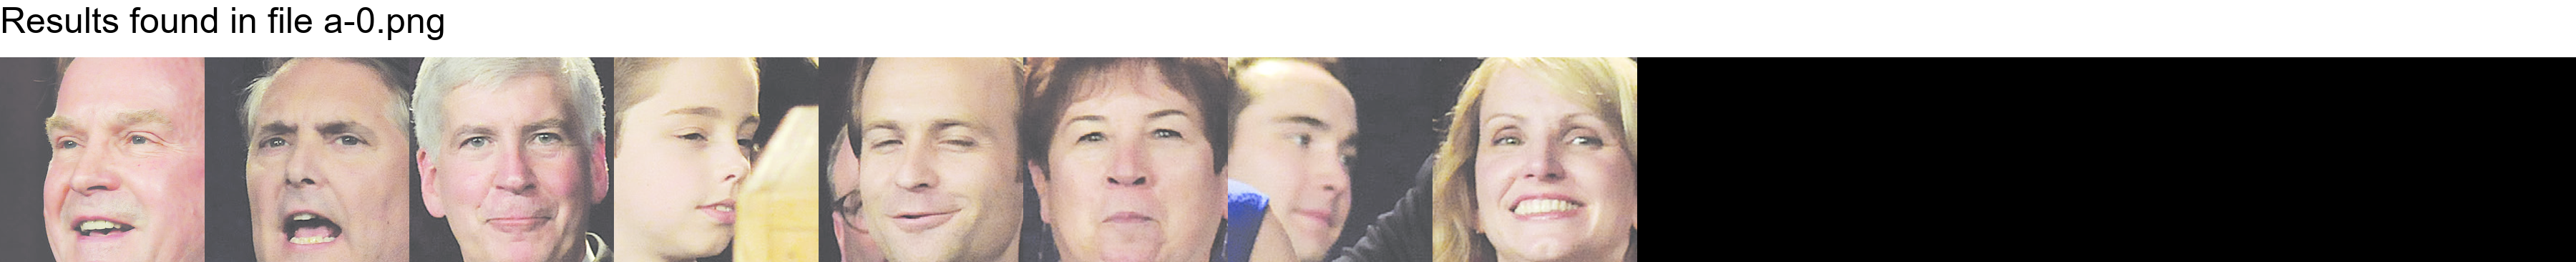

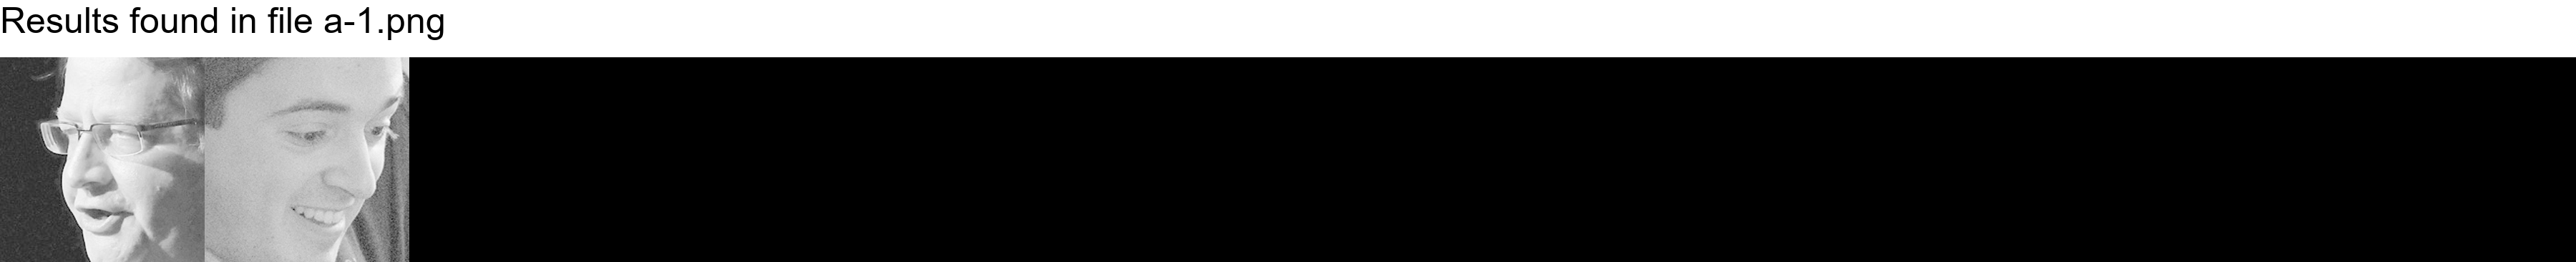

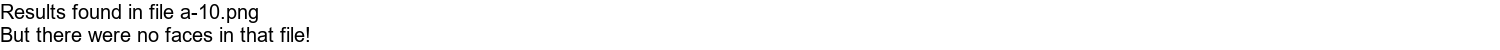

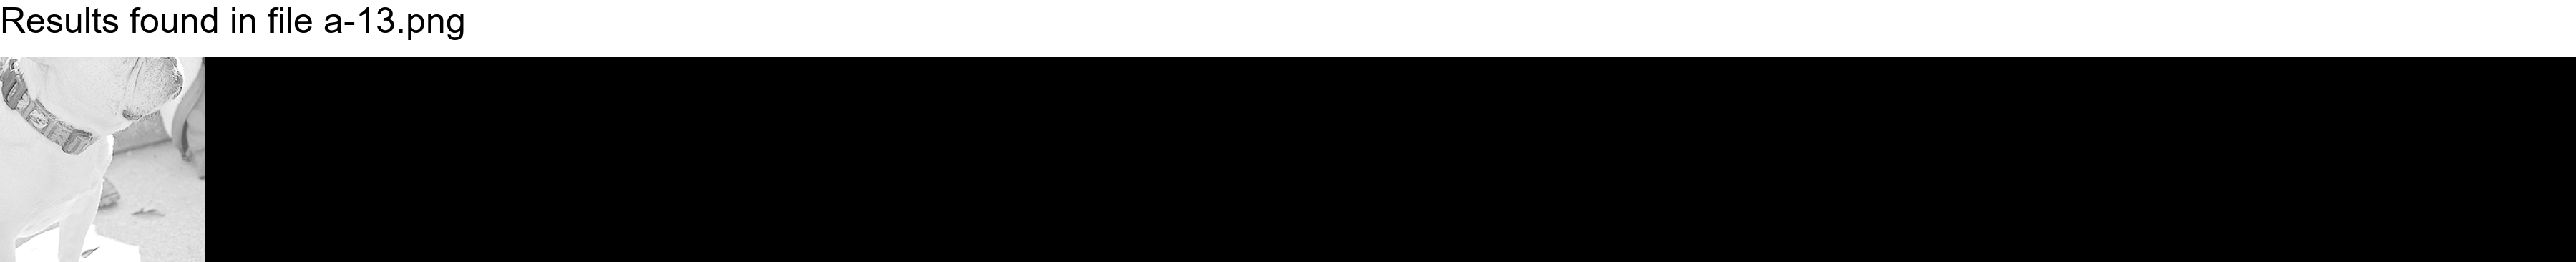

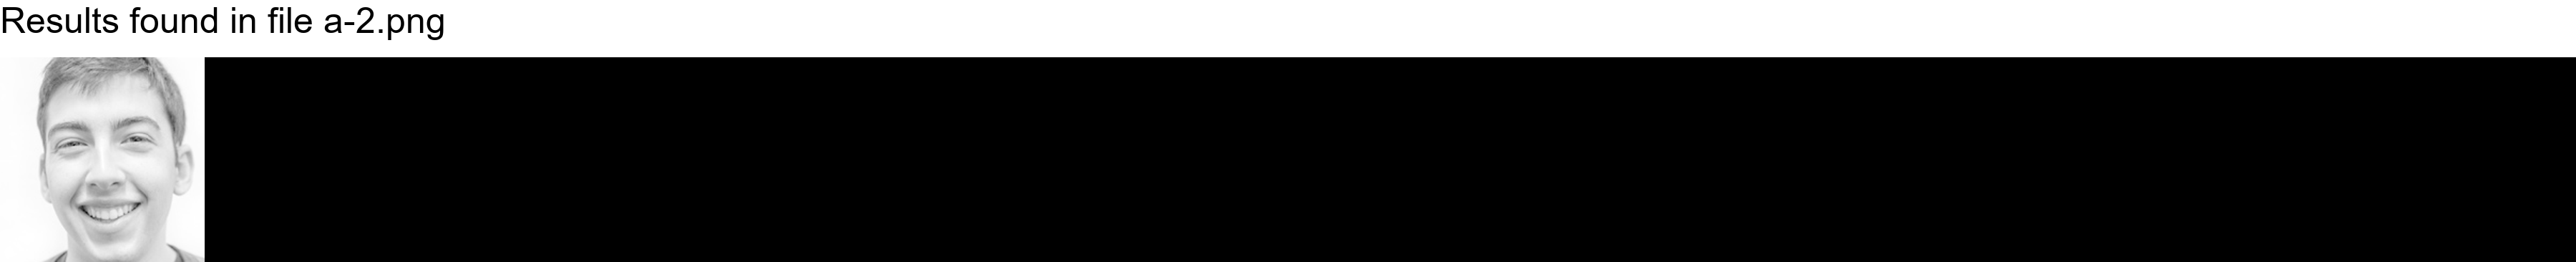

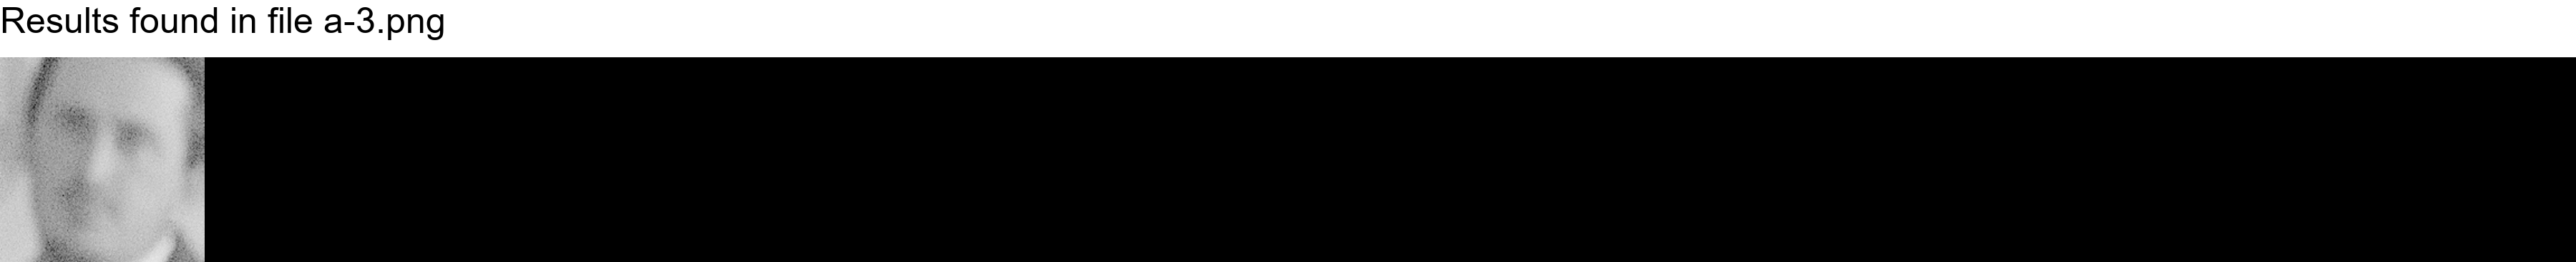

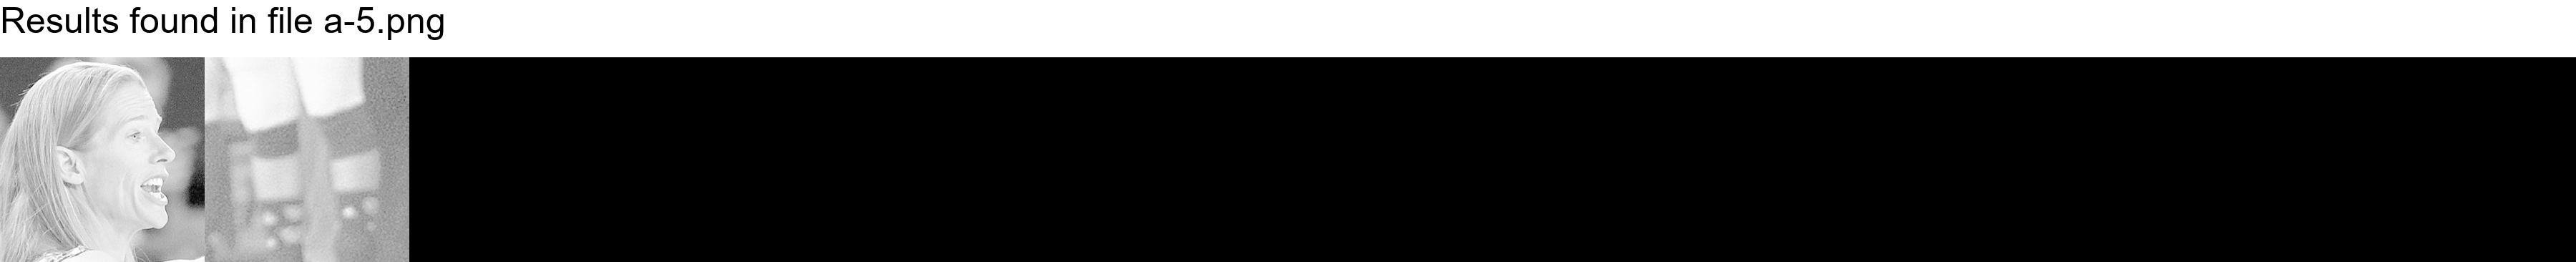

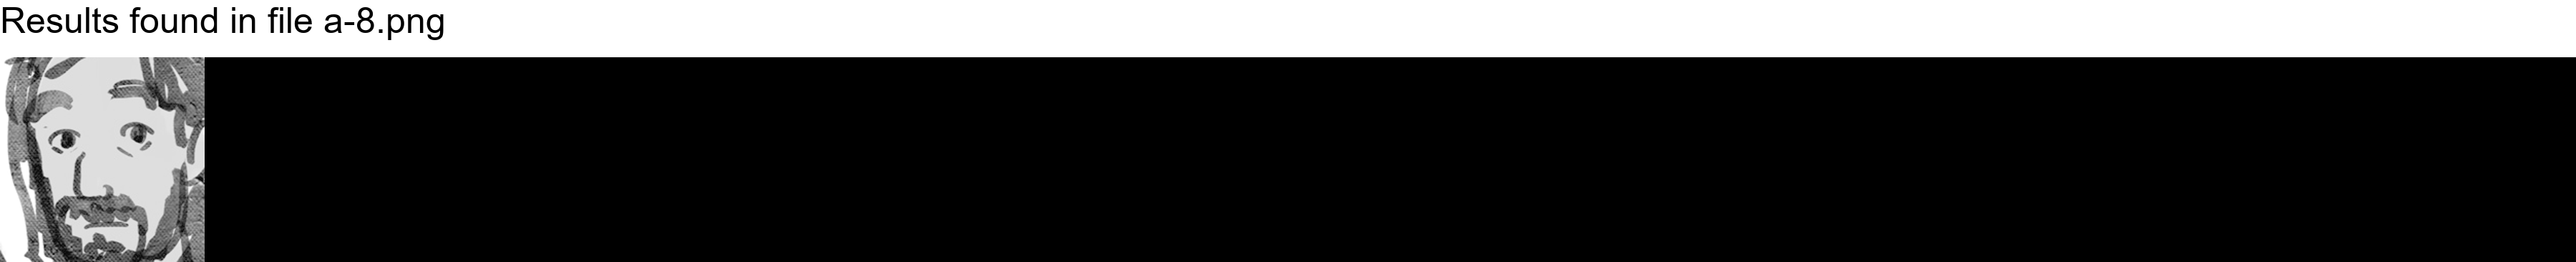

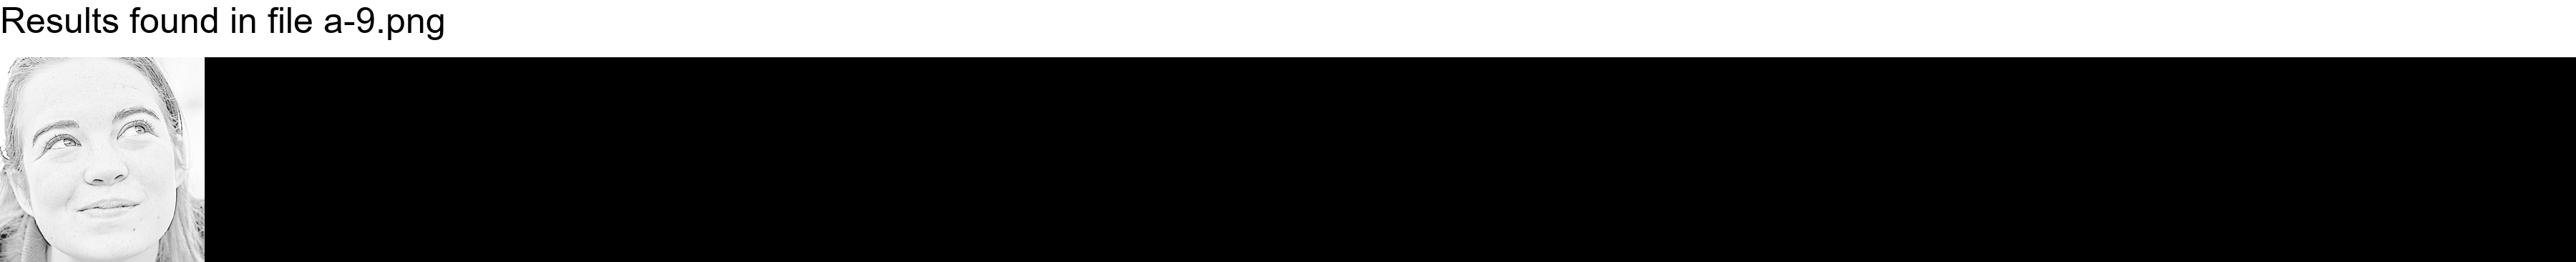

In [11]:
usr_input = 'Mark'

textRecognition(file)
manualTresh(file)

for k,v in ref_dict.items():
    if usr_input.lower() in v['text']:
        display(v['imgs'])

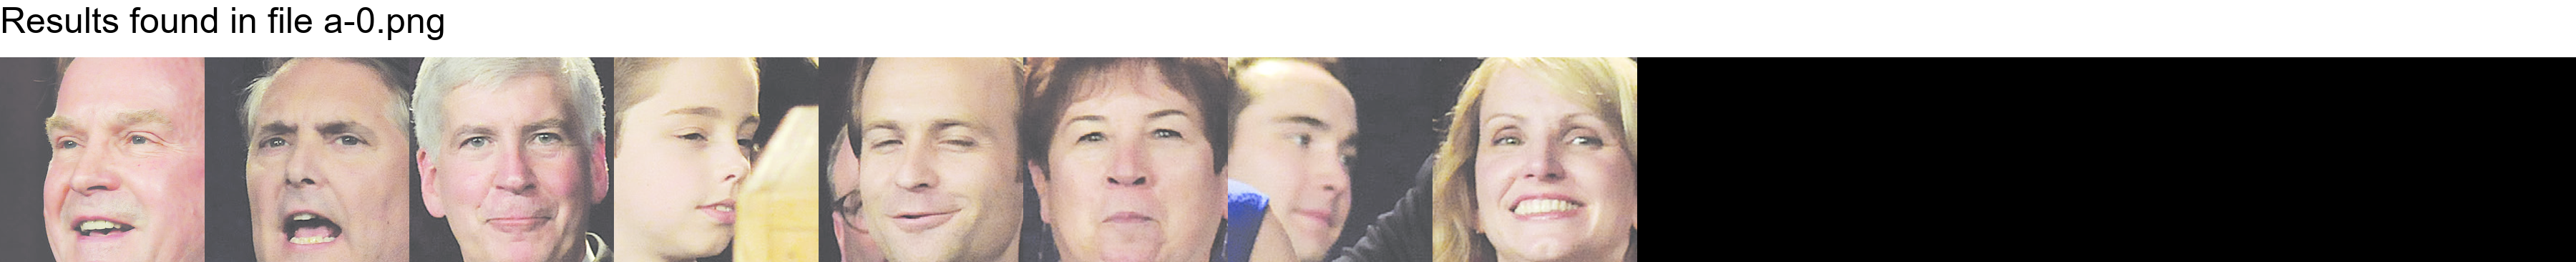

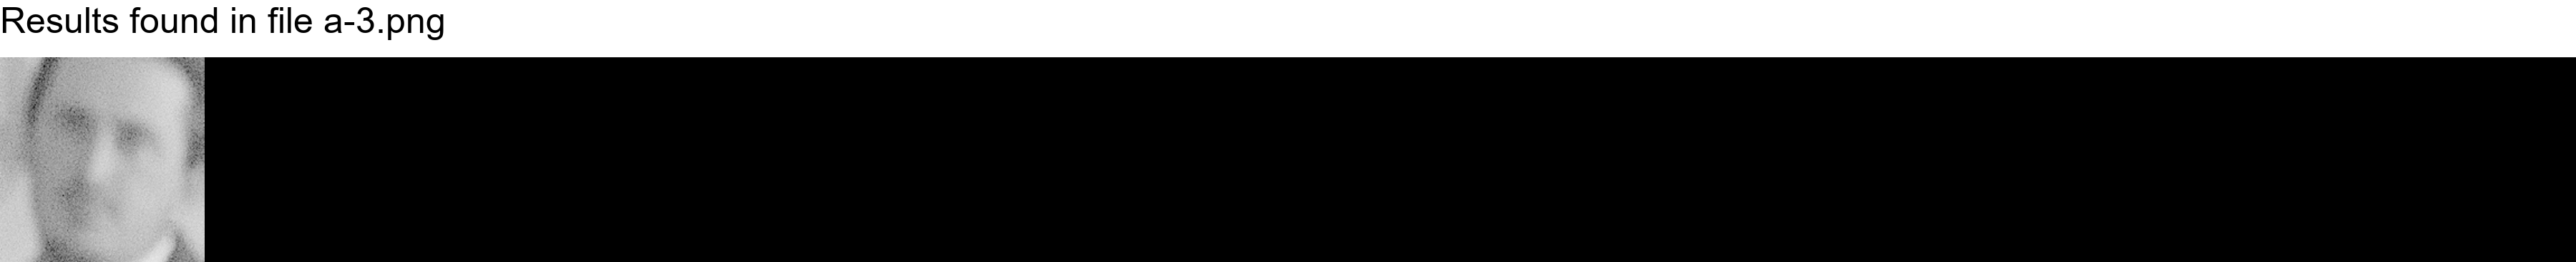

In [12]:
# Re-Initialize dictionary
ref_dict = {}

usr_input = 'Christopher'

textRecognition(small_file)
manualTresh(small_file)

for k,v in ref_dict.items():
    if usr_input.lower() in v['text']:
        display(v['imgs'])